In [1]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import Point , LineString , Polygon , MultiPoint

# 1.实例化一个GeoSeries对象

In [2]:
# 几何对象——点
gpoint = gpd.GeoSeries([Point(i ,i+2) for i in range(5)])
gpoint

0    POINT (0.00000 2.00000)
1    POINT (1.00000 3.00000)
2    POINT (2.00000 4.00000)
3    POINT (3.00000 5.00000)
4    POINT (4.00000 6.00000)
dtype: geometry

<AxesSubplot:>

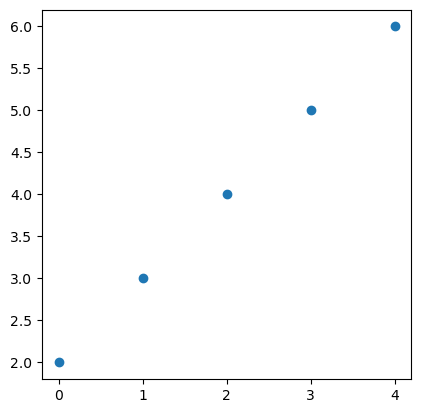

In [3]:
gpoint.plot()

In [4]:
# 几何对象——线
gline = gpd.GeoSeries([LineString([(i,i),(i+4,i+2)]) for i in range(5)])
gline

0    LINESTRING (0.00000 0.00000, 4.00000 2.00000)
1    LINESTRING (1.00000 1.00000, 5.00000 3.00000)
2    LINESTRING (2.00000 2.00000, 6.00000 4.00000)
3    LINESTRING (3.00000 3.00000, 7.00000 5.00000)
4    LINESTRING (4.00000 4.00000, 8.00000 6.00000)
dtype: geometry

<AxesSubplot:>

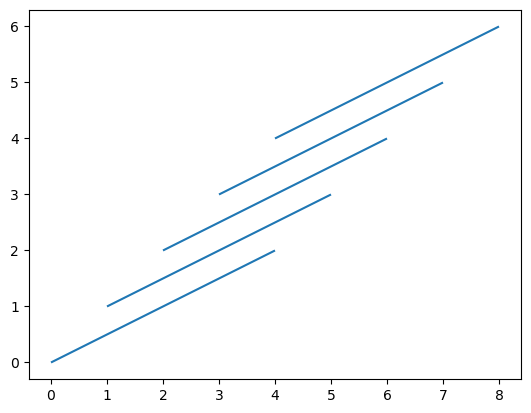

In [5]:
gline.plot()

In [6]:
# 几何对象——面
gpolygon = gpd.GeoSeries(Polygon([(i,i) , (i+4,i+2) , (6,0)]) for i in range(5))
gpolygon

0    POLYGON ((0.00000 0.00000, 4.00000 2.00000, 6....
1    POLYGON ((1.00000 1.00000, 5.00000 3.00000, 6....
2    POLYGON ((2.00000 2.00000, 6.00000 4.00000, 6....
3    POLYGON ((3.00000 3.00000, 7.00000 5.00000, 6....
4    POLYGON ((4.00000 4.00000, 8.00000 6.00000, 6....
dtype: geometry

<AxesSubplot:>

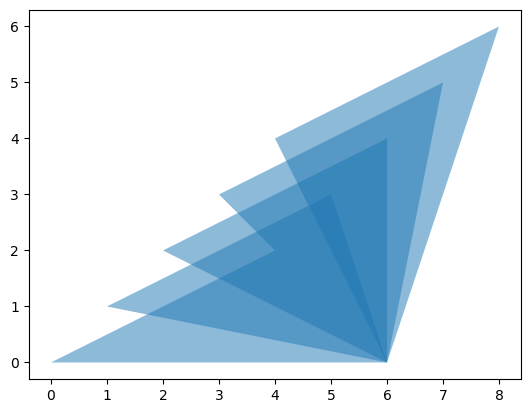

In [7]:
gpolygon.plot(alpha=0.5)

In [8]:
# 几何对象——点+线+面
gm = gpd.GeoSeries([Point(0,0),
                    LineString([(1,1) , (6,3)]),
                   Polygon([(2,3),(6,5),(3,6)])])
gm

0                              POINT (0.00000 0.00000)
1        LINESTRING (1.00000 1.00000, 6.00000 3.00000)
2    POLYGON ((2.00000 3.00000, 6.00000 5.00000, 3....
dtype: geometry

<AxesSubplot:>

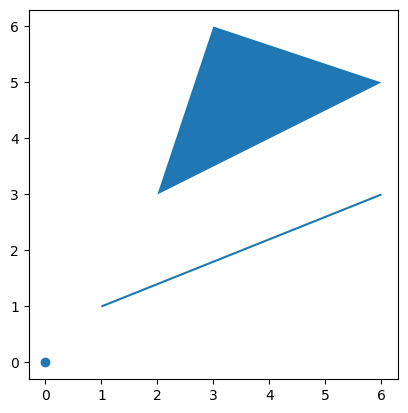

In [9]:
gm.plot()

# 2.属性：

In [10]:
# 获取点的x坐标
gpoint.x

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [11]:
# 获取线段长度
gline.length

0    4.472136
1    4.472136
2    4.472136
3    4.472136
4    4.472136
dtype: float64

In [12]:
# 获取面的面积
gpolygon.area

0     6.0
1     7.0
2     8.0
3     9.0
4    10.0
dtype: float64

In [13]:
# 获取面的边界
gpolygon.bounds

,minx,miny,maxx,maxy
0,0.0,0.0,6.0,2.0
1,1.0,0.0,6.0,3.0
2,2.0,0.0,6.0,4.0
3,3.0,0.0,7.0,5.0
4,4.0,0.0,8.0,6.0


In [14]:
# 获取每个几何对象的类型
gm.geom_type

0         Point
1    LineString
2       Polygon
dtype: object

In [15]:
# 获取每个几何体的边界
gm.boundary

0                             GEOMETRYCOLLECTION EMPTY
1        MULTIPOINT (1.00000 1.00000, 6.00000 3.00000)
2    LINESTRING (2.00000 3.00000, 6.00000 5.00000, ...
dtype: geometry

<AxesSubplot:>

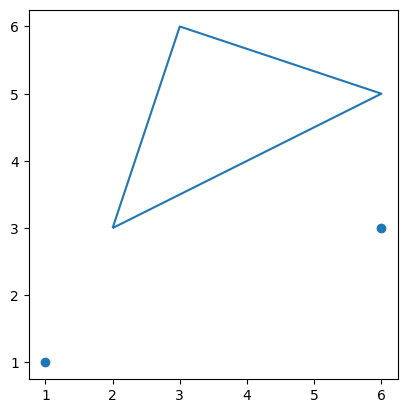

In [16]:
gm.boundary.plot()

# 3.方法

### centroid

In [17]:
# centroid: 计算质心点
gpolygon.centroid

0    POINT (3.33333 0.66667)
1    POINT (4.00000 1.33333)
2    POINT (4.66667 2.00000)
3    POINT (5.33333 2.66667)
4    POINT (6.00000 3.33333)
dtype: geometry

<AxesSubplot:>

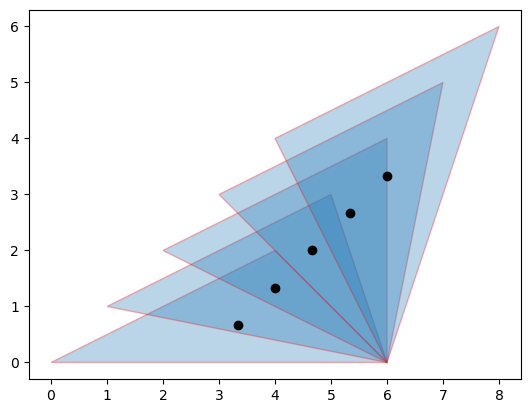

In [18]:
ax = gpolygon.plot(alpha=0.3 , edgecolor="red")
gpolygon.centroid.plot(ax=ax , color="k")

### distance()

In [19]:
# distance(): 计算最小距离
gpoint

0    POINT (0.00000 2.00000)
1    POINT (1.00000 3.00000)
2    POINT (2.00000 4.00000)
3    POINT (3.00000 5.00000)
4    POINT (4.00000 6.00000)
dtype: geometry

In [20]:
point = Point(0,4)

In [21]:
gpoint.distance(point)

0    2.000000
1    1.414214
2    2.000000
3    3.162278
4    4.472136
dtype: float64

Text(-0.2, 4.2, 'Target Point')

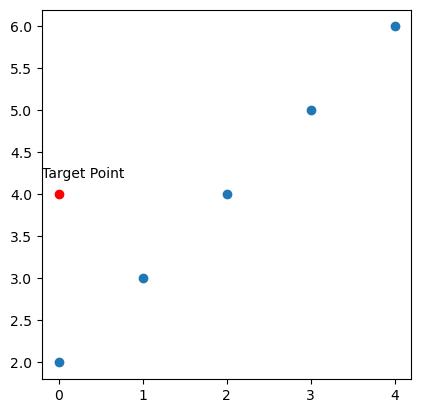

In [22]:
ax = gpoint.plot()
gpd.GeoSeries(point).plot(ax=ax , color="red")
ax.text(-0.2,4.2 ,"Target Point")

### buffer、convex_hull、envelope

In [23]:
x = np.random.randn(20)
y = np.random.randn(20)

In [24]:
gpoints = gpd.GeoSeries(MultiPoint(list(zip(x,y))))
gpoints

0    MULTIPOINT (0.01240 0.46406, 0.20449 0.86943, ...
dtype: geometry

In [25]:
# 缓冲区分析
gpoints.buffer(0.5)

0    MULTIPOLYGON (((2.14903 -0.73207, 2.14663 -0.7...
dtype: geometry

In [26]:
# 最小凸包
gpoints.convex_hull

0    POLYGON ((-2.82792 -1.63039, -0.89056 1.84711,...
dtype: geometry

In [27]:
# 最小外包矩形（边与坐标轴平行）
gpoints.envelope

0    POLYGON ((-2.82792 -1.63039, 1.64903 -1.63039,...
dtype: geometry

<AxesSubplot:>

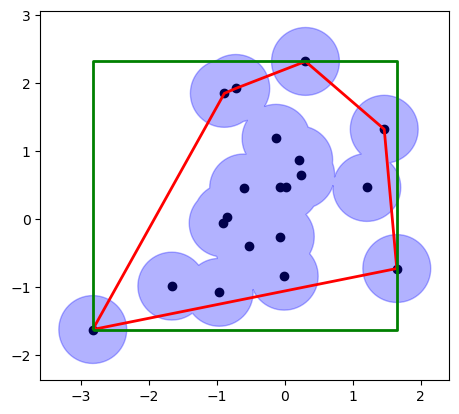

In [28]:
ax = gpoints.plot(color="k")
gpoints.buffer(0.5).plot(ax=ax,facecolor="blue",edgecolor="blue",alpha=0.3)
gpoints.convex_hull.plot(ax=ax,facecolor="none",edgecolor="red" , lw=2)
gpoints.envelope.plot(ax=ax,facecolor="none",edgecolor="green" , lw=2)

# 3.关系判断

In [29]:
gpolygon = gpd.GeoSeries(Polygon([(i,i) , (i+4,i+2) , (6,0)]) for i in range(5))
gpolygon

0    POLYGON ((0.00000 0.00000, 4.00000 2.00000, 6....
1    POLYGON ((1.00000 1.00000, 5.00000 3.00000, 6....
2    POLYGON ((2.00000 2.00000, 6.00000 4.00000, 6....
3    POLYGON ((3.00000 3.00000, 7.00000 5.00000, 6....
4    POLYGON ((4.00000 4.00000, 8.00000 6.00000, 6....
dtype: geometry

In [30]:
point = Point(6.5,4)
line = LineString([(0,4) , (8,4)])

In [31]:
gpolygon.contains(point)

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [32]:
gpolygon.intersects(point)

0    False
1    False
2    False
3     True
4     True
dtype: bool

<AxesSubplot:>

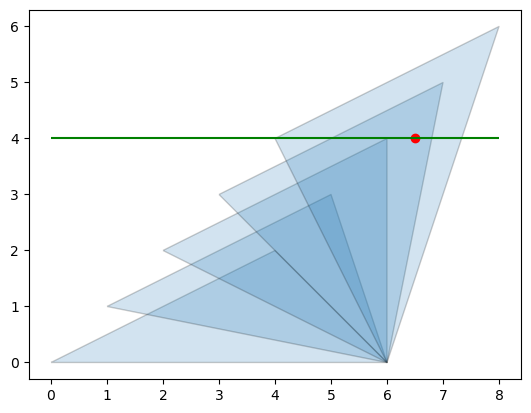

In [33]:
ax = gpolygon.plot(alpha=0.2 , edgecolor='k')
gpd.GeoSeries(point).plot(ax=ax,color="red")
gpd.GeoSeries(line).plot(ax=ax,color="green")